In [ ]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии

In [1]:
import requests
from tqdm import tqdm

In [2]:
sber = '3529'     # идентификатор работодателя
url = f'https://api.hh.ru/vacancies?employer_id={sber}' # адрес для получения вакансий конкретной компании
page = 0          # нумерация начинается с 0
per_page = 100    # 20 объектов на странице по умолчанию и 100 максимум

In [3]:
response = requests.get(url,
                        params={
                            'page': page,
                            'per_page': per_page
                        }
                        )
vacancies = response.json()
number_of_pages = vacancies.get('pages')
number_of_pages     # глубина возвращаемых результатов не может быть больше 2000

20

In [4]:
all_vacancies = []
for sheet in tqdm(range(number_of_pages)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}'
    response = requests.get(url,
                            params={
                                'page': page,
                                'per_page': per_page
                            }
                            )
    vacancies = response.json()
    vacancy_ids = [element.get('id') for element in vacancies.get('items')]
    all_vacancies.extend(vacancy_ids)

print('Список ID вакансий собран')

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.08s/it]

Список ID вакансий собран


In [5]:
len(all_vacancies)

2000

In [6]:
all_vacancies_description = []  # новый список с описанием вакансий

for id in tqdm(all_vacancies):
    url = f'https://api.hh.ru/vacancies/{id}' # адрес для получения отдельной вакансии
    response_vac = requests.get(url, params={})
    vacancy = response_vac.json()
    all_vacancies_description.append(vacancy)

print('Список вакансий собран')

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [28:01<00:00,  1.19it/s]

Список вакансий собран


In [7]:
len(all_vacancies_description)

2000

In [11]:
all_vacancies_description[10]

{'id': '50711840',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Специалист СБЕР',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '66',
  'name': 'Нижний Новгород',
  'url': 'https://api.hh.ru/areas/66'},
 'salary': {'from': 40062, 'to': 45438, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Нижний Новгород',
  'street': 'улица Академика Сахарова',
  'building': '2А',
  'description': None,
  'lat': 56.266627,
  'lng': 44.024743,
  'raw': 'Нижний Новгород, улица Академика Сахарова, 2А',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'shift', 'name': 'Сменный график'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-stat', 'name': 'Сбер. Начало карьеры'},
 'contac

In [ ]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [8]:
import pandas as pd

In [9]:
# преобразуем список "all_vacancies_description" в DataFrame

vacancy_df = pd.DataFrame(all_vacancies_description, columns=['id', 'name', 'area', 'salary', 'experience', 'schedule',
                                                              'employment', 'description', 'key_skills', 'published_at',
                                                             'created_at'])

vacancy_df.rename(columns={'key_skills':'skills'}, inplace=True)

vacancy_df

,id,name,area,salary,experience,schedule,employment,description,skills,published_at,created_at
0,53568652,Менеджер по обслуживанию,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 67000, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",<p>Сбер — лучший работодатель России. У нас бо...,[],2022-03-09T13:38:12+0300,2022-03-09T13:38:12+0300
1,54044500,Специалист контактного центра,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...","{'from': 50000, 'to': 82000, 'currency': 'RUR'...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",<p>Сбер – это не только компания с многолетней...,[],2022-03-18T13:41:11+0300,2022-03-18T13:41:11+0300
2,54592406,Специалист технической поддержки Sber Cloud,"{'id': '89', 'name': 'Тверь', 'url': 'https://...","{'from': 51200, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",<p>Мы расширяемся и ищем специалистов 1 линии ...,"[{'name': 'Английский язык'}, {'name': 'Делово...",2022-04-05T13:11:57+0300,2022-04-05T13:11:57+0300
3,54575811,Старший менеджер по обслуживанию,"{'id': '91', 'name': 'Кызыл', 'url': 'https://...","{'from': 48600, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Работа в команде'}, {'name': 'Клиен...",2022-04-05T07:05:23+0300,2022-04-05T07:05:23+0300
4,54594061,Junior Frontend разработчик,"{'id': '3', 'name': 'Екатеринбург', 'url': 'ht...",None,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}","<p>Сбер — больше чем банк, это вселенная полез...","[{'name': 'Git'}, {'name': 'React'}, {'name': ...",2022-04-05T13:44:48+0300,2022-04-05T13:44:48+0300
...,...,...,...,...,...,...,...,...,...,...,...
1995,54391683,Заведующий складом,"{'id': '78', 'name': 'Самара', 'url': 'https:/...","{'from': 40000, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",<strong>Обязанности:</strong> <ul> <li>Организ...,"[{'name': 'Складская логистика'}, {'name': 'Ск...",2022-03-28T16:42:02+0300,2022-03-28T16:42:02+0300
1996,51657864,Старший клиентский менеджер,"{'id': '17', 'name': 'Белгород', 'url': 'https...","{'from': 48000, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'flexible', 'name': 'Гибкий график'}","{'id': 'full', 'name': 'Полная занятость'}",<p>Сбер — лучший работодатель России. У нас бо...,[],2022-03-24T16:56:14+0300,2022-03-24T16:56:14+0300
1997,50752498,Специалист поддержки корпоративных клиентов,"{'id': '66', 'name': 'Нижний Новгород', 'url':...","{'from': 43500, 'to': None, 'currency': 'RUR',...","{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'shift', 'name': 'Сменный график'}","{'id': 'full', 'name': 'Полная занятость'}","<p><strong>Сбер ищет специалиста, который буде...","[{'name': 'Деловая переписка'}, {'name': 'Дело...",2022-04-01T12:17:01+0300,2022-04-01T12:17:01+0300
1998,52172134,Старший клиентский менеджер,"{'id': '95', 'name': 'Тюмень', 'url': 'https:/...","{'from': 64500, 'to': None, 'currency': 'RUR',...","{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",<p><strong>Сбер — лучший работодатель России. ...,"[{'name': 'Активные продажи'}, {'name': 'Консу...",2022-03-30T16:42:21+0300,2022-03-30T16:42:21+0300


In [10]:
# переводим даты публикаций в datetime

vacancy_df['published_at'] = pd.to_datetime(vacancy_df['published_at'], dayfirst=True)
vacancy_df['published_at'].dtype

datetime64[ns, pytz.FixedOffset(180)]

In [11]:
# переводим даты создания в datetime

vacancy_df['created_at'] = pd.to_datetime(vacancy_df['created_at'], dayfirst=True)
vacancy_df['created_at'].dtype

datetime64[ns, pytz.FixedOffset(180)]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Постройте график опубликованных вакансий по датам

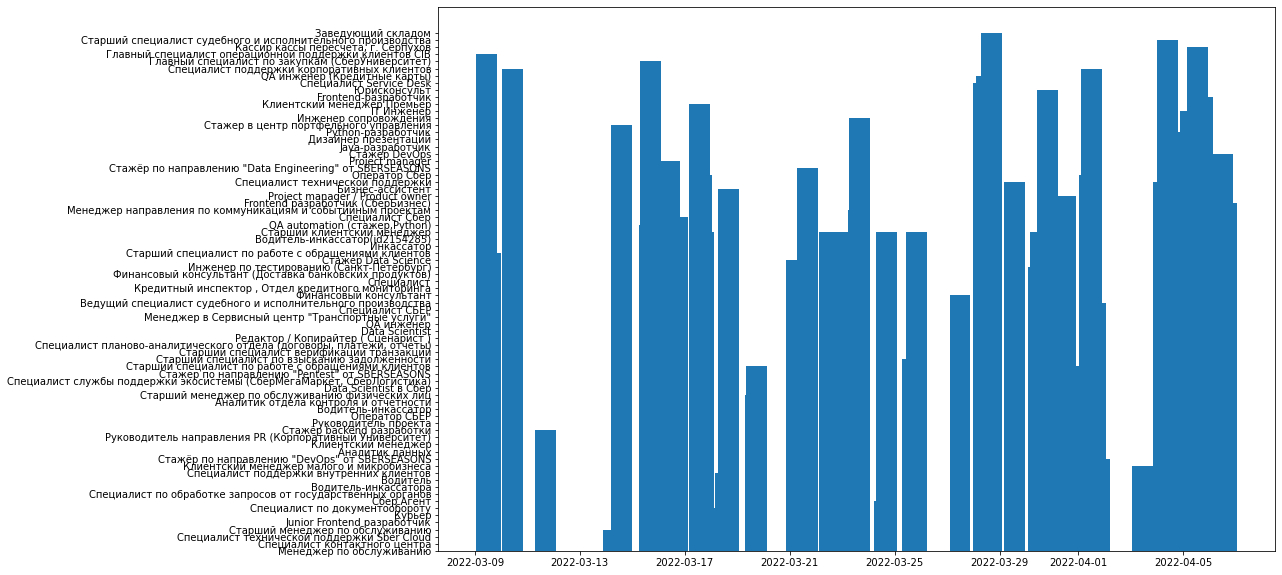

In [17]:
plt.figure(figsize=(15,10))
plt.bar(vacancy_df['published_at'], vacancy_df['name'])
plt.show()

In [ ]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [80]:
vacancy_df['day_of_week'] = vacancy_df['published_at'].dt.day_name()

In [86]:
vacancy_df.groupby('day_of_week').agg({'id':'count'}).sort_values(by='id', ascending=False)

,id
day_of_week,
Monday,534
Wednesday,480
Friday,300
Tuesday,300
Thursday,246
Sunday,100
Saturday,40


In [ ]:
# Найдите те вакансии с использованием python, которые вам интересны

In [141]:
vac_name_list = vacancy_df['name'].to_list()
vac_name_list = [row.upper() for row in vac_name_list]

In [143]:
from collections import Counter

In [146]:
vacancies_i_like = [row for row in vac_name_list if row.count('DATA')]
len(vacancies_i_like)

80

In [147]:
{row for row in vacancies_i_like}

{'DATA SCIENTIST',
 'SENIOR DATA ANALYST (В ТРАЙБ «МАССОВАЯ ПЕРСОНАЛИЗАЦИЯ»)',
 'СТАЖЁР ПО НАПРАВЛЕНИЮ "DATA ENGINEERING" ОТ SBERSEASONS',
 'СТАЖЕР DATA SCIENCE'}

In [ ]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и

In [19]:
vac_skills = vacancy_df.loc[(vacancy_df['name'].str.contains('Data'))]['skills'].drop_duplicates()
vac_skills.to_list()

[[],
 [{'name': 'Python'},
  {'name': 'SQL'},
  {'name': 'Математическая статистика'},
  {'name': 'Математическое моделирование'},
  {'name': 'Big Data'},
  {'name': 'Machine Learning'},
  {'name': 'Java'},
  {'name': 'Исследование данных'}],
 [{'name': 'Python'},
  {'name': 'SQL'},
  {'name': 'СУБД'},
  {'name': 'MS Excel'},
  {'name': 'Git'},
  {'name': 'Анализ данных'}]]

In [ ]:
# Постройте график наиболее востребованных вакансий

In [20]:
most_required_vac = vacancy_df.groupby('name').agg({'id':'count'}).sort_values(by='id', ascending=False)
most_required_vac.head(10)

,id
name,
Старший клиентский менеджер,160
Старший менеджер по обслуживанию,120
Финансовый консультант,100
Сбер Агент,60
Специалист контактного центра,60
Специалист технической поддержки,40
Специалист Сбер,40
Специалист поддержки корпоративных клиентов,40
Старший специалист по взысканию задолженности,40


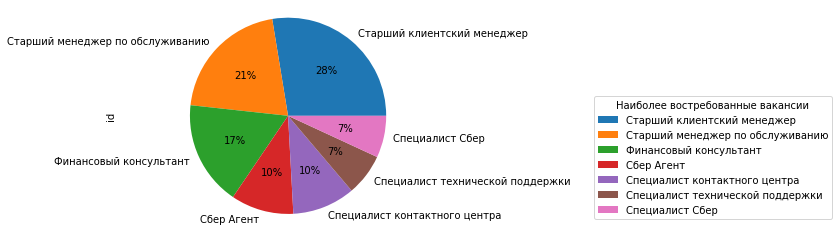

In [50]:
most_required_vac.head(7).plot.pie(subplots=True, autopct='%1.0f%%')
plt.axis('equal')
plt.legend(title='Наиболее востребованные вакансии', loc='lower left', bbox_to_anchor=(1.4, 0), ncol=1)
plt.show()